# Application

## Simulated Test Data

In [1]:
%run Test/test.py

### True Source Components

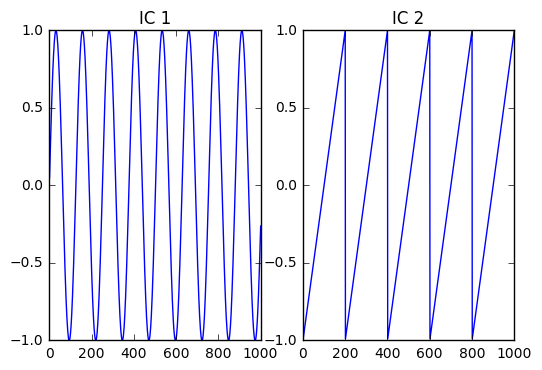

In [2]:
test(S_test)

### ICs by FastICA

In [3]:
%run Source/fastICA_ne.py

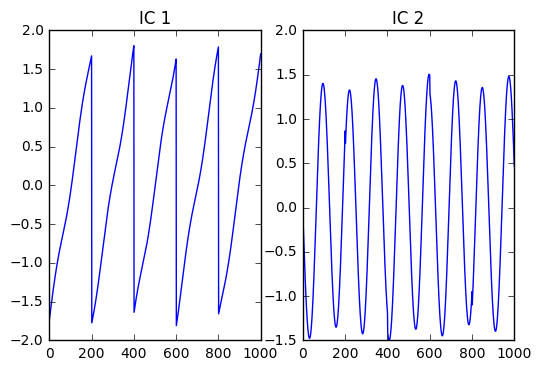

In [4]:
test(fastICA_ne(X_test,f = "logcosh",n_comp =2, alpha = 1,maxit = 200, tol = 0.0001)['S'])

## Real World Data

### fMRI

This is a subsample of real fMRI data from the 1000 Connectome Project.

In [5]:
%run Test/fMRI.py

In [6]:
fMRI.shape

(30000, 20)

Before applying the fastICA, a visualization of the original data

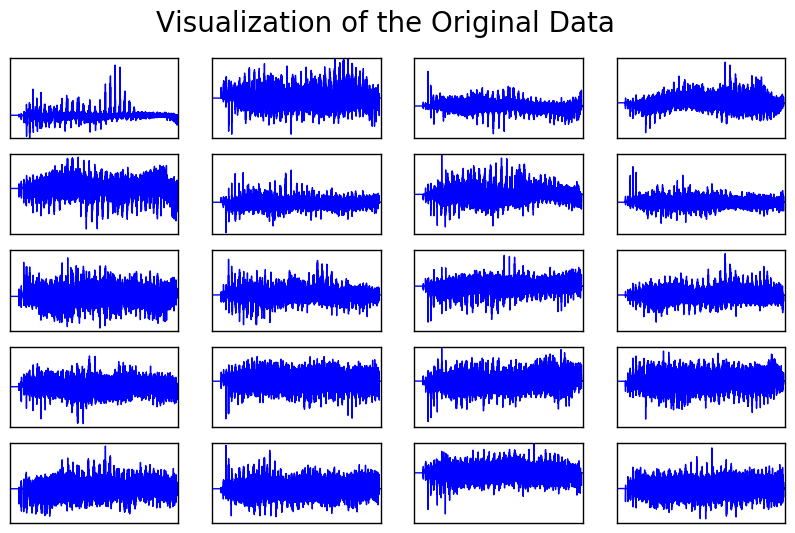

In [7]:
fig = plt.figure(figsize=(10,6)) 
for i in range(20):
    ax = plt.subplot(5,4,i+1)
    plt.plot(np.arange(30000)+1, fMRI[:,i])
    plt.xticks([])
    plt.yticks([])
fig.suptitle('Visualization of the Original Data', fontsize=20)
pass

After appplying FastICA algorithm, we visualize each independent component in the following plot

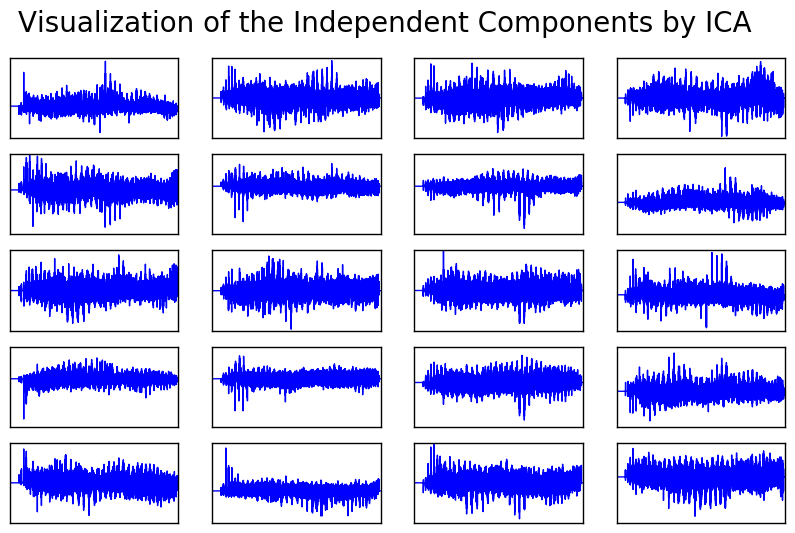

In [8]:
ica_fMRI = fastICA_ne(fMRI,f = "logcosh", alpha = 1,maxit = 200, tol = 0.0001)
S_fMRI = ica_fMRI['S']
fig = plt.figure(figsize=(10,6)) 
for i in range(20):
    ax = plt.subplot(5,4,i+1)
    plt.plot(np.arange(30000)+1, S_fMRI[:,i])
    plt.xticks([])
    plt.yticks([])
fig.suptitle('Visualization of the Independent Components by ICA', fontsize=20)
pass

### Finance Data

In [9]:
%%writefile Test/finance.py

import pandas as pd
import numpy as np
from functools import reduce

df_INTC = pd.read_csv("INTC.csv")
df_CSCO = pd.read_csv("CSCO.csv")
df_QCOM = pd.read_csv("QCOM.csv")
df_EBAY = pd.read_csv("EBAY.csv")
df_AAPL = pd.read_csv("AAPL.csv")
df_AMZN = pd.read_csv("AMZN.csv")

dfs = [df_INTC[['Date', 'Close']], df_CSCO, df_QCOM, df_EBAY,df_AAPL,df_AMZN]
df = reduce(lambda left,right: pd.merge(left,right[['Date', 'Close']],on='Date'), dfs)
df.columns = ['Date','Intel','Cisco','QUALCOMM','eBay','Apple','Amazon']

X_finance = df.ix[:,1:7]
X_finance = X_finance.apply(np.log)          # log
X_finance = X_finance.diff().drop(0)         # stock return

Overwriting Test/finance.py


In [10]:
%run Test/finance.py

In [11]:
X_finance.shape

(1837, 6)

In [12]:
np.random.seed(663)
ica_finance = fastICA_ne(np.array(X_finance),f = "logcosh",n_comp=6, alpha = 1,maxit = 200, tol = 0.0001)

In [13]:
%%writefile Test/plot_finance.py

import numpy as np
import matplotlib.pyplot as plt

def plot_finance(X_finance,ica_finance):
    models = [np.array(X_finance), ica_finance['S'],ica_finance['S'] @ ica_finance['A']]
    names = ['Observations (mixed signals)',
             'ICA recovered signals',
            'Reconstructed signals']
    colors = ['red', 'steelblue', 'orange','black','blue','yellow']

    plt.figure(figsize=(10,6))
    for ii, (model, name) in enumerate(zip(models, names), 1):  # enumerate starts from 1
        plt.subplot(4, 1, ii)
        plt.title(name)
        for sig, color in zip(model.T, colors):
            plt.plot(sig, color=color)
            plt.xticks([])
            plt.yticks([])

    plt.subplots_adjust(0.09, 0.09, 0.94, 0.94, 0.5, 1)

    X_re = ica_finance['S'] @ ica_finance['A']
    model100 = models = [np.array(X_finance)[:100,],X_re[:100,],ica_finance['S'][:100,0],ica_finance['S'][:100,1],ica_finance['S'][:100,2],ica_finance['S'][:100,3],ica_finance['S'][:100,4],ica_finance['S'][:100,5]]
    names = ['Observations (recent 100 trading days)',
            'Reconstruct signals (recent 100 trading days)',
            'IC 1 (recent 100 trading days)',
            'IC 2 (recent 100 trading days)',
            'IC 3 (recent 100 trading days)',
            'IC 4 (recent 100 trading days)',
            'IC 5 (recent 100 trading days)',
            'IC 6 (recent 100 trading days)']
    colors = ['red', 'steelblue', 'orange','black','blue','yellow']

    plt.figure(figsize=(10,6))
    for ii, (model, name) in enumerate(zip(model100, names), 1):  # enumerate starts from 1
        plt.subplot(4, 2, ii)
        plt.title(name)
        if ii <3:
            for sig, color in zip(model.T, colors):
                plt.plot(sig, color=color)
                plt.xticks([])
                plt.yticks([])
        else:
            plt.plot(model, color='green')
            plt.xticks([])
            plt.yticks([])

    plt.subplots_adjust(0.09, 0.09, 0.94, 0.94, 0.5, 1)

Overwriting Test/plot_finance.py


In [14]:
%run Test/plot_finance.py

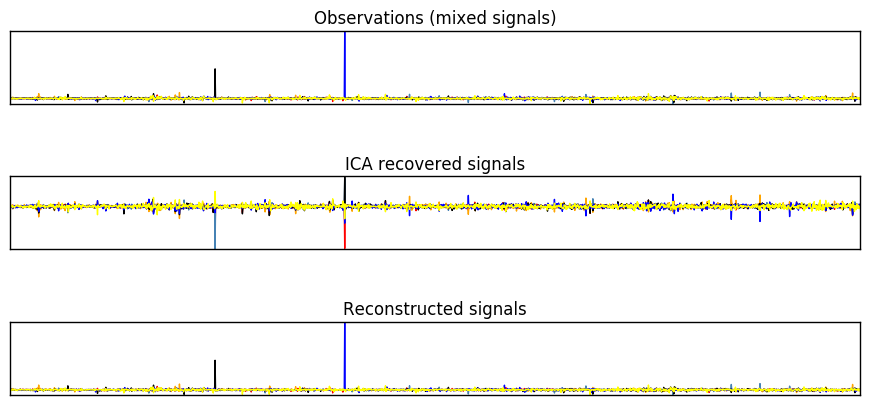

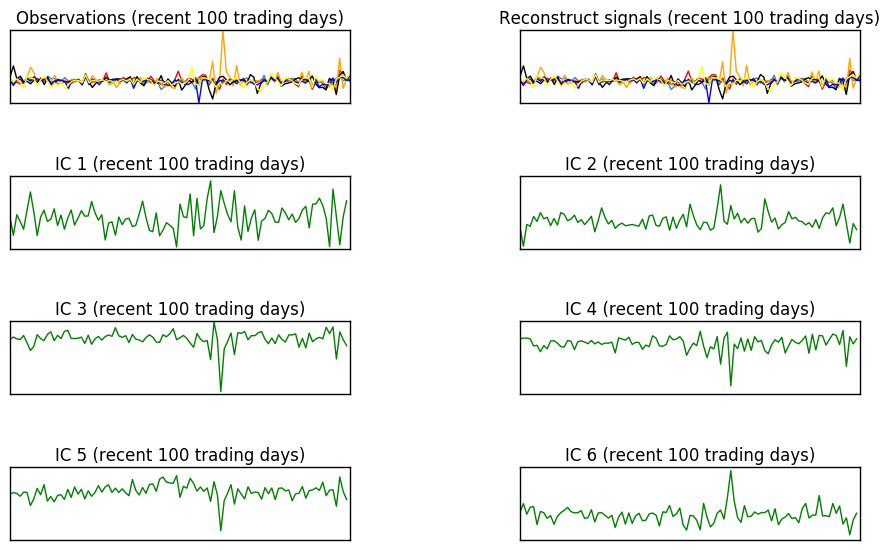

In [15]:
plot_finance(X_finance,ica_finance)

# Comparative Analysis 

Here we follow the example from http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html

In [16]:
%%writefile Test/comparedata.py

# Generate observation data
import numpy as np
from scipy import signal

np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)                   # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))          # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S_compare = np.c_[s1, s2, s3]
S_compare += 0.2 * np.random.normal(size=S_compare.shape)  # Add noise

S_compare /= S_compare.std(axis=0)                      # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X_compare = np.dot(S_compare, A.T)                      

Overwriting Test/comparedata.py


In [17]:
%run Test/comparedata.py

In [18]:
S_ica = fastICA_ne(X_compare,f = "logcosh", alpha = 1,maxit = 200, tol = 0.0001)['S']

In [19]:
%%writefile Test/plot_compare.py

from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt

def plot_compare(X_compare,S_compare,S_ica):

    pca = PCA(n_components=3)
    S_pca = pca.fit_transform(X_compare)

    fa = FactorAnalysis(n_components=3)
    S_fa= fa.fit_transform(X_compare)

    models = [X_compare, S_compare,S_ica, S_pca, S_fa]
    names = ['Observations (mixed signal)',
             'True Sources',
             'FastICA recovered IC signals',
             'PCA recovered IC signals',
            'Factor Analysis recovered IC signals']
    colors = ['red', 'steelblue', 'orange']


    plt.figure(figsize=(10,6))
    for ii, (model, name) in enumerate(zip(models, names), 1):  # enumerate starts from 1
        plt.subplot(5, 1, ii)
        plt.title(name)
        for sig, color in zip(model.T, colors):
            plt.plot(sig, color=color)
            plt.xticks([])
            plt.yticks([])
    plt.subplots_adjust(0.09, 0.09, 0.94, 0.94, 0.5, 1)

Overwriting Test/plot_compare.py


In [20]:
%run Test/plot_compare.py

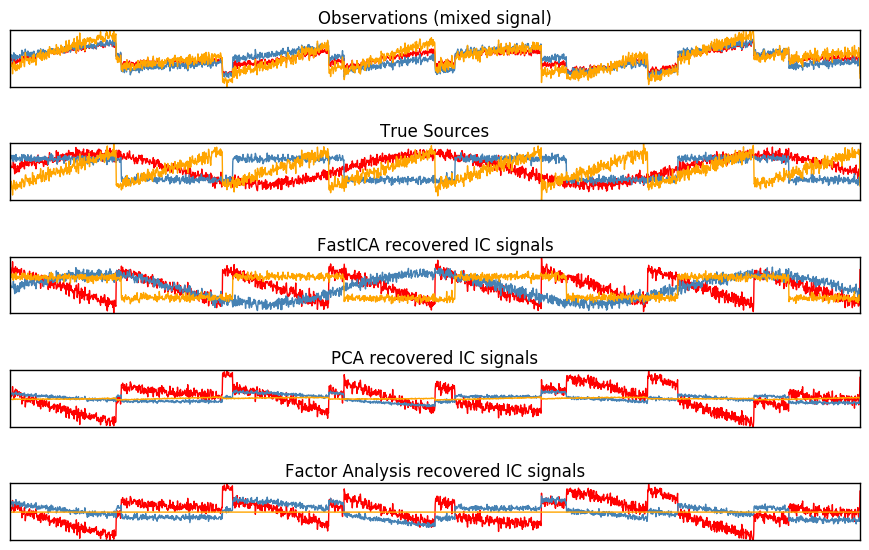

In [21]:
plot_compare(X_compare,S_compare,S_ica)